In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
T=1000
P0=10
mu=0.001
last_p=np.log(P0)
log_returns=np.zeros(T)
prices=np.zeros(T)
for t in range(T):
  r=0.01*np.random.randn()
  p=last_p+mu+r
  log_returns[t]=r+mu
  prices[t]=np.exp(p)
  last_p=p

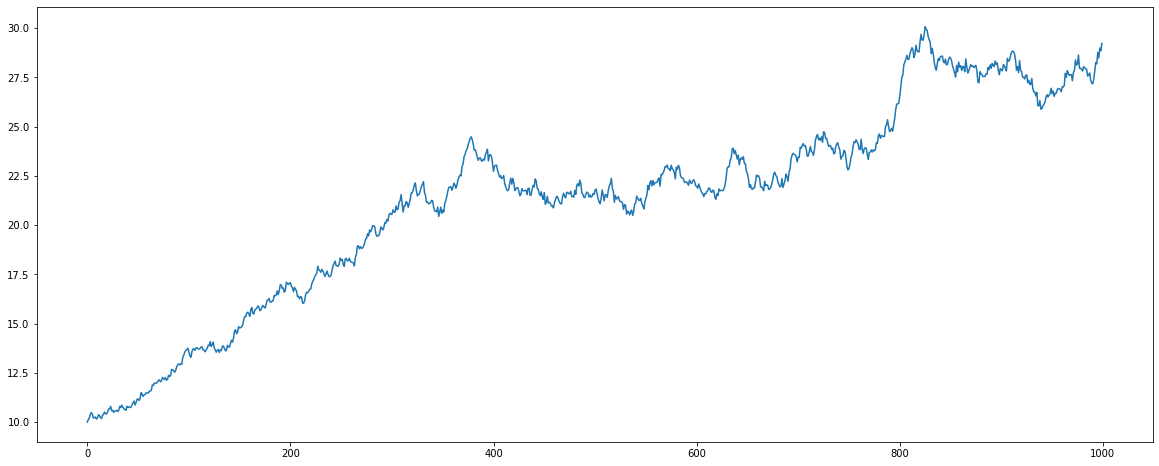

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(prices);

In [ ]:
## Naive forecast

In [ ]:
pip install -U scikit-learn

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error ,mean_absolute_error,r2_score, mean_squared_error
import pandas as pd

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

File ‘SPY.csv’ already there; not retrieving.



In [ ]:
df=pd.read_csv('SPY.csv',index_col='Date',parse_dates=True)

In [ ]:
df['ClosePrediction']=df['Close'].shift(1)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [ ]:
y_true=df.iloc[1:]['Close']
y_pred=df.iloc[1:]['ClosePrediction']

In [ ]:
# SSE
(y_true - y_pred).dot(y_true - y_pred)

6330.37428949261

In [ ]:
# MSE
mean_squared_error(y_true,y_pred)

2.7985739564511984

In [ ]:
# MSE again
(y_true-y_pred).dot(y_true-y_pred)/len(y_true)

2.798573956451198

In [ ]:
# RMSE

mean_squared_error(y_true,y_pred,squared=False)

1.6728938867875627

In [ ]:
mean_absolute_error(y_true,y_pred)

1.1457559803120336

In [ ]:
r2_score(y_true,y_pred)

0.9989603259063914

In [ ]:
mean_absolute_percentage_error(y_true,y_pred)

0.006494073151422375

In [ ]:
# sMAPE
def smape(y_true,y_pred):
  numerator=np.abs(y_true-y_pred)
  denominator=(np.abs(y_true)+np.abs(y_pred))/2
  ratio =numerator/denominator
  return ratio.mean()

In [ ]:
smape(y_true,y_pred)

0.006491365814068423

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2021-08-02 13:55:15--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  5.47MB/s    in 0.7s    

2021-08-02 13:55:16 (5.47 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [ ]:
close=pd.read_csv('sp500_close.csv',index_col=0,parse_dates=True)

In [ ]:
goog=close[['GOOG']].copy().dropna()

In [ ]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


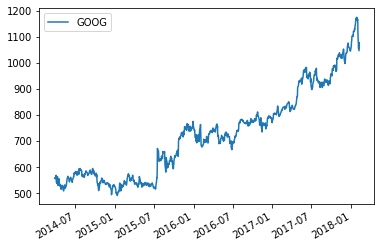

In [ ]:
goog.plot();

In [ ]:
goog_ret=np.log(goog.pct_change(1)+1)

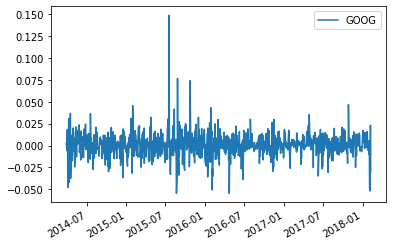

In [ ]:
goog_ret.plot();

In [ ]:
goog['SMA-10']=goog['GOOG'].rolling(10).mean()

In [ ]:
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [ ]:
type(goog['SMA-10'])

pandas.core.series.Series

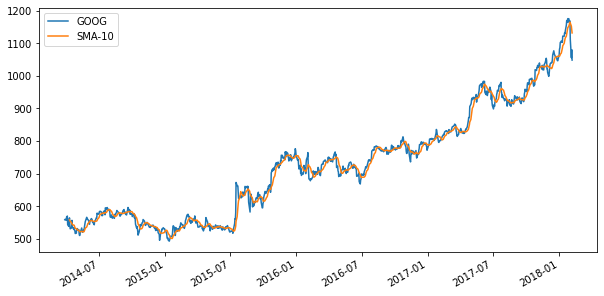

In [ ]:
goog.plot(figsize=(10,5));

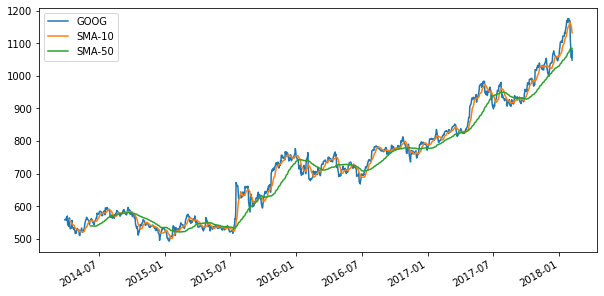

In [ ]:
goog['SMA-50']=goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5));

In [ ]:
goog_aapl=close[['GOOG','AAPL']].copy().dropna()
cov=goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [ ]:
cov.loc['2018-02-07']

GOOG       AAPL
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

In [ ]:
goog_aapl_ret=np.log(1+goog_aapl.pct_change(1))

In [ ]:
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [ ]:
goog_aapl_ret['GOOG-SMA-50']=goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50']=goog_aapl_ret['AAPL'].rolling(50).mean()

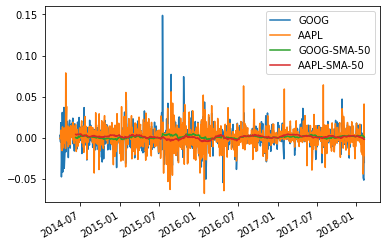

In [ ]:
goog_aapl_ret.plot();

In [ ]:
cov=goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).cov()
cov.tail(4)

GOOG-SMA-50   AAPL-SMA-50
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [ ]:
cov.loc['2017-01-10']

GOOG-SMA-50   AAPL-SMA-50
2017-01-10 GOOG-SMA-50  1.613116e-07  1.279793e-07
           AAPL-SMA-50  1.279793e-07  2.669411e-07

In [ ]:
 corr=goog_aapl_ret[['GOOG-SMA-50','AAPL-SMA-50']].rolling(50).corr()

In [ ]:
corr.tail(4)

GOOG-SMA-50  AAPL-SMA-50
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000